[Indice](index.ipynb) | Previo: [ProblemaNCuerpos.SolucionNumerica](06.03.00.00.ProblemaNCuerpos.SolucionNumerica.ipynb) | Siguiente: [Problema2Cuerpos](07.00.00.00.Problema2Cuerpos.ipynb)

### 6.4.5. Constantes de movimiento y teorema del virial
<a id='ncuerpos_numerico_constantes_virial'></a>

Una interesante primera "aplicación" de la solución numérica al problema de los N cuerpos vista en estas secciones, es la de verificar "experimentalmente" los resultados analíticos descritos en la [Sección *¿Solución analítica?*](Not Found#solucione_analitica) y en la [Sección *Energía y virial*](06.03.00.00.ProblemaNCuerpos.TeoremaVirial.ipynb#ncuerpos_virial).

Para ello estudiaremos un sistema de 5 partículas con masas, posiciones y velocidades generadas al azar.  La solución numérica a las e.d.m.r. del sistema, obtenida con los métodos vistos en esta sección, nos permitirá obtener las listas de sus posiciones y velocidades para distintos valores del tiempo.  Con estas listas podremos calcular y graficar los valores de las constantes de movimiento, momento lineal, momento angular, energía y de las cantidades críticas para el teorema del virial.  

Comencemos pues por generar las condiciones iniciales del sistema usando, entre otras cosas, la rutina `sistema_a_Y` del Alg. ([sistema_a_Y](06.03.00.00.ProblemaNCuerpos.SolucionNumerica.ipynb#code:sistema_a_Y)) y las rutinas de generación de números aleatorios que usamos en la [Sección *Centro de masa*](05.02.02.00.Mecanica.Dinamica.SistemaParticulas.ipynb#centro_masa):

In [2]:
#Importa todos las rutinas y constantes de otras libretas
from pymcel.export import *

<a id='code:ncuerpos_constantes_condiciones_iniciales'></a>

In [3]:
#Número de partículas
N=5

#Generación de las condiciones para cada partícula
from numpy.random import uniform,seed
seed(7)

#Condiciones iniciales
sistema=[]
for i in range(N):
    particula=dict(
        m=uniform(0.0,1.0),
        r=uniform(-1.0,1.0,size=3),
        v=uniform(-1.0,1.0,size=3)
    )
    sistema+=[particula]

N,mus,Y0s=sistema_a_Y(sistema)

#Tiempos
from numpy import linspace
Nt=100
ts=linspace(0.0,10.0,Nt)

In [4]:
print(f"N = {N}")
print(f"mus = {mus}")
print(f"Y0s = {Y0s}")

N = 5
mus = [0.07630829 0.07205113 0.2881456  0.9501295  0.66901324]
Y0s = [ 5.59837584e-01 -1.23181537e-01  4.46930356e-01 -4.63122040e-01
 -2.34998349e-04  3.58459992e-01  8.19187055e-01 -5.73229293e-01
 -9.57520764e-02 -5.39394242e-01  9.69798385e-02  8.18256750e-01
 -6.44942805e-02 -5.90301819e-01 -1.84682218e-02  9.55979024e-01
  7.69917408e-02  2.24092732e-03  6.07478072e-01 -2.38117734e-01
 -8.68127306e-01  8.62412039e-01 -9.50201545e-01  2.01097835e-01
 -7.33661108e-01  4.68251613e-02  5.00819718e-01 -2.55230621e-01
 -4.51976903e-02 -2.68219228e-01]


Ahora podemos resolver las ecuaciones de movimiento y extraer las posiciones y velocidades de las partículas:

In [5]:
#Solución
from scipy.integrate import odeint
solucion=odeint(edm_ncuerpos,Y0s,ts,args=(N,mus))

#Extracción de las posiciones y velocidades
rs,vs=solucion_a_estado(solucion,N,Nt)

Una gráfica del movimiento de las partículas en tres dimensiones se puede obtener usando la rutina `plot_ncuerpos_3d` que definimos en el Alg. ([plot_ncuerpos_3d](06.03.00.00.ProblemaNCuerpos.SolucionNumerica.ipynb#code:plot_ncuerpos_3d)):

In [6]:
%matplotlib nbagg

<a id='code:ncuerpos_ejemplo2'></a>

<IPython.core.display.Javascript object>


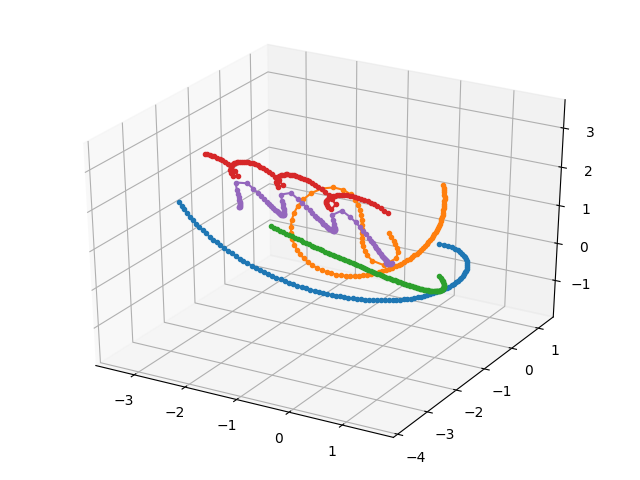

In [7]:
fig=plot_ncuerpos_3d(rs,vs,marker='.');

<a id='code:ncuerpos_ejemplo2'></a><center><b>Figura 6.66.</b> </center>

Ahora podemos calcular las constantes de movimiento.  En este caso, sin embargo, la dificultad algorítmica estriba en que las posiciones y velocidades de las partículas están guardadas en las matrices `rs` y `vs` que no son triviales de manipular.  

Así, por ejemplo el momento lineal inicial de la partícula 0 esta dado por:

In [8]:
p_0_0=mus[0]*vs[0,0,:]

In [9]:
print(f"p_0_0 = {p_0_0}")

p_0_0 = [0.07294912 0.00587511 0.000171  ]


Pero si queremos el momento lineal de esa partícula en cualquier tiempo será:

In [10]:
p_0=mus[0]*vs[0,:,:]

In [11]:
print(f"p_0(t) = \n{p_0[:5]}\n...")

p_0(t) = 
[[ 0.07294912  0.00587511  0.000171  ]
 [ 0.0653799   0.00154574 -0.00381787]
 [ 0.05898078 -0.00240643 -0.0070324 ]
 [ 0.05337202 -0.00601935 -0.00963238]
 [ 0.04832467 -0.00932501 -0.0117392 ]]
...


La cuadratura de momento lineal total $C_{P_\mathrm{CM}}$ la podemos obtener si sumamos uno a uno los momentos lineales en cada tiempo de todas las partículas del sistema:

In [12]:
from numpy import zeros
C_PCM=zeros((Nt,3))
for i in range(N):
    C_PCM=C_PCM+mus[i]*vs[i,:,:]

In [13]:
print(f"C_PCM = \n{C_PCM[:5]}\n...")

C_PCM = 
[[-0.50260689 -0.27082582  0.29196827]
 [-0.50260689 -0.27082582  0.29196827]
 [-0.50260689 -0.27082582  0.29196827]
 [-0.50260689 -0.27082582  0.29196827]
 [-0.50260689 -0.27082582  0.29196827]]
...


Y como vemos el valor del momento lineal es el mismo, que es lo que esperabamos de acuerdo con la teoría.  

Por otro lado la cuadratura de momento angular será:

In [14]:
from numpy import zeros,cross
C_L=zeros((Nt,3))
for i in range(N):
    C_L=C_L+mus[i]*cross(rs[i,:,:],vs[i,:,:])

In [15]:
print(f"C_L = \n{C_L[:5]}\n...")

C_L = 
[[ 0.05919488 -0.37417055 -0.11685289]
 [ 0.05919488 -0.37417055 -0.11685289]
 [ 0.05919488 -0.37417055 -0.11685289]
 [ 0.05919488 -0.37417055 -0.11685289]
 [ 0.05919488 -0.37417055 -0.11685288]]
...


Que de nuevo resulta constante como esperabamos.

Finalmente la cuadratura de energía se puede calcular usando la fórmula para la energía potencial la dada por la Ec. ([ncuerpos_potencial](#mjx-eqn-eq%3Ancuerpos_potencial)):

In [16]:
from numpy import zeros
from numpy.linalg import norm

C_E=zeros(Nt)
K=zeros(Nt)
U=zeros(Nt)
for i in range(N):
    K=K+0.5*mus[i]*norm(vs[i,:,:],axis=1)**2
    for j in range(N):
        if i==j:continue
        rij=norm(rs[i,:,:]-rs[j,:,:],axis=1)
        U+=-0.5*mus[i]*mus[j]/rij
C_E=K+U

In [17]:
print(f"C_E = {C_E[:5]}...")

C_E = [-0.53641214 -0.53641214 -0.53641214 -0.53641214 -0.53641214]...


Como vemos el valor de la energía es negativo, lo que podría implicar que el sistema es ligado (tal y como sugieren las trayectorias de las partículas.)  Sin embargo, como mencionamos en la [Sección *Virial*](06.03.00.00.ProblemaNCuerpos.TeoremaVirial.ipynb#virial) la condición $E<0$ es necesaria más no suficiente.  Para saber si el sistema es ligado debemos evaluar los promedios a largo plazo de las energía cinética y potencial y compararlas con la energía total:

In [18]:
E=C_E[0]
Kmean=K.mean()
Umean=U.mean()

In [19]:
print(f"-E = {-E}")
print(f"<K> = {Kmean}")
print(f"-<U>/2 = {-Umean/2}")


-E = 0.5364121422571039
<K> = 0.5201023115823993
-<U>/2 = 0.5282572686928928


Como vemos la identidad $\langle K\rangle=-E=-\langle U\rangle/2$ se cumple aproximadamente para la ventana de tiempo en la que estudiamos el sistema y podríamos sospechar que es estable.

El lector puede escoger otro valor de la semilla en el Alg. ([ncuerpos_constantes_condiciones_iniciales](#code:ncuerpos_constantes_condiciones_iniciales)) y correr nuevamente esta libreta para ver si el sistema resultante es ligado o no.  También puede cambiar el valor del tiempo de integración para verificar si la supuesta estabilidad se mantiene a largo plazo.

### 6.4.6. Una algoritmo general
<a id='ncuerpos_algoritmo_general'></a>

Usando lo visto en esta y en las secciones anteriores, podemos construir ahora un algoritmo general que nos servirá en lo sucesivo para partiendo de la descripción de un sistema de N cuerpos obtener las posiciones y velocidades de las partículas que lo constituyen, resolviendo numéricamente las e.d.m.r. para un determinado conjunto de tiempo provistos.  

El algoritmo presentado a continuación define esa rutina.  Para ello usa las rutinas definidas en los Algs. ([edm_ncuerpos](06.03.00.00.ProblemaNCuerpos.SolucionNumerica.ipynb#code:edm_ncuerpos), [sistema_a_Y](06.03.00.00.ProblemaNCuerpos.SolucionNumerica.ipynb#code:sistema_a_Y), [solucion_a_estado](06.03.00.00.ProblemaNCuerpos.SolucionNumerica.ipynb#code:solucion_a_estado)) y los procedimientos para el cálculo de las constantes de movimiento presentados en la [Sección *Constantes de movimiento y teorema del virial*](#ncuerpos_numerico_constantes_virial).

<a id='code:ncuerpos_solucion'></a>

In [20]:
def ncuerpos_solucion(sistema,ts):
    #Condiciones iniciales
    from pymcel.export import sistema_a_Y
    N,mus,Y0s=sistema_a_Y(sistema)
    
    #Masa total
    M=sum(mus)
    
    #Número de tiempos
    Nt=len(ts)
    
    #Solución
    from scipy.integrate import odeint
    solucion=odeint(edm_ncuerpos,Y0s,ts,args=(N,mus))
    
    #Extracción de las posiciones y velocidades
    from pymcel.export import solucion_a_estado
    rs,vs=solucion_a_estado(solucion,N,Nt)
    
    #Calcula las constantes de movimiento
    from numpy import zeros
    PCM=zeros(3)
    for i in range(N):
        PCM=PCM+mus[i]*vs[i,0,:]

    #Posición del CM como función del tiempo    
    RCM=zeros((Nt,3))
    for i in range(N):
        RCM=RCM+mus[i]*rs[i,:,:]
    RCM/=M

    #Momento angular
    from numpy import zeros,cross
    L=zeros(3)
    for i in range(N):
        L=L+mus[i]*cross(rs[i,0,:],vs[i,0,:])

    #Energía total
    from numpy.linalg import norm
    K=zeros(Nt)
    U=zeros(Nt)
    for i in range(N):
        K=K+0.5*mus[i]*norm(vs[i,:,:],axis=1)**2
        for j in range(N):
            if i==j:continue
            rij=norm(rs[i,:,:]-rs[j,:,:],axis=1)
            U+=-0.5*mus[i]*mus[j]/rij
    E=K[0]+U[0]
    
    #Constantes
    constantes=dict(M=M,
                    RCM=RCM,PCM=PCM,
                    L=L,K=K,U=U,E=E)
        
    #Posiciones y velocidades relativas al centro de masa    
    from numpy import subtract
    rps=rs-RCM
    vps=subtract(vs,PCM/M)
    
    #Devuelve las posiciones y velocidades
    return rs,vs,rps,vps,constantes

La rutina se invocaría así:

In [21]:
rs,vs,rps,vps,constantes=ncuerpos_solucion(sistema,ts)

In [22]:
print(f"M = {constantes['M']}")
print(f"R_CM_0 = {constantes['RCM'][0]}")
print(f"P_CM = {constantes['PCM']}")
print(f"L = {constantes['L']}")
print(f"E = {constantes['E']}")
print(f"<K> = {constantes['K'].mean()}")
print(f"<U> = {constantes['U'].mean()}")

M = 2.055647763339272
R_CM_0 = [-0.15092322 -0.23222195  0.38792434]
P_CM = [-0.50260689 -0.27082582  0.29196827]
L = [ 0.05919488 -0.37417055 -0.11685289]
E = -0.5364121422571039
<K> = 0.5201023115823993
<U> = -1.0565145373857856


Una representación gráfica de las posiciones de las partículas en el sistema de referencia del centro de masa:

<IPython.core.display.Javascript object>


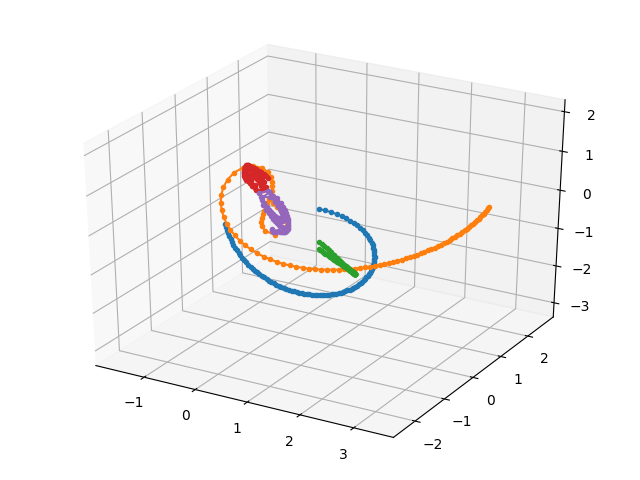

In [23]:
fig=plot_ncuerpos_3d(rps,vps,marker='.')

<a id='fig:06.03.00.00.ProblemaNCuerpos.SolucionNumerica.ConstantesMovimiento_67'></a><center><b>Figura 6.67.</b> </center>

[Indice](index.ipynb) | Previo: [ProblemaNCuerpos.SolucionNumerica](06.03.00.00.ProblemaNCuerpos.SolucionNumerica.ipynb) | Siguiente: [Problema2Cuerpos](07.00.00.00.Problema2Cuerpos.ipynb)